## Train a top2vec model

### Part I: default model (total nr of topics are used)
### Part II: hierarchically reduced model (100 topics)

In [2]:
import ndjson
import glob
import numpy as np
import pandas as pd
import top2vec
from top2vec import Top2Vec 

### Load primitives and filter events longer than 50 characters

In [8]:
with open('../../chronicling-topics/corpus/models/primitives_annotated.ndjson') as f:
    data = ndjson.load(f)

In [9]:
# filter events longer than 50 characters
data_filtered = []
for item in data:
    if len(item['text']) > 50:
        data_filtered.append(item)

# prepare data for top2vec, create two lists of texts and document_ids
corpus = []
document_ids = []

for key in data_filtered:
    text = key['text']
    id = key['id']
    document_ids.append(id)
    corpus.append(text)

## Part I: default model

### Train, save and load a top2vec model

In [4]:
# train model
model = Top2Vec(corpus, document_ids = document_ids)

2022-04-06 11:00:25,508 - top2vec - INFO - Pre-processing documents for training


KeyboardInterrupt: 

In [ ]:
# model.get_num_topics()

In [ ]:
# save model
model.save('../models/top2vec/top2vecmodel_50_2')

In [11]:
# load model
model = Top2Vec.load('../../chronicling-topics/corpus/models/top2vecmodel_50_2')

### Show 5 topics most close to keyword

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["aardbeving"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

### Get topic distribution per document

The build matrix is too large, so this has to be done in multiple runs. The output-files are saved, and merged afterwards

In [ ]:
# a very unpretty way to get the topics per document in one file, part one
chunk_ids = document_ids[100000:113000]

topic_ids, topic_vals, words, word_scores = model.get_documents_topics(doc_ids = chunk_ids, num_topics=415)


representations = []
for doc_topic_ids, doc_topic_vals in zip(topic_ids, topic_vals):
    representations.append(
        doc_topic_vals[doc_topic_ids]
    )

merged_rep = [list(l) for l in zip(chunk_ids, representations)]
np.save('/work/62138/models/representations_5.npy', merged_rep)

In [ ]:
# merge files

merged_rep_1 = np.load('/work/62138/models/representations_1.npy', allow_pickle=True).tolist()
merged_rep_2 = np.load('/work/62138/models/representations_2.npy', allow_pickle=True).tolist()
merged_rep_3 = np.load('/work/62138/models/representations_3.npy', allow_pickle=True).tolist()
merged_rep_4 = np.load('/work/62138/models/representations_4.npy', allow_pickle=True).tolist()
merged_rep_5 = np.load('/work/62138/models/representations_5.npy', allow_pickle=True).tolist()

merged = merged_rep_1 + merged_rep_2 + merged_rep_3 + merged_rep_4 + merged_rep_5
np.save('/work/62138/models/representation_final_50.npy', merged)

## Part II: hierarchically reduced model (100 topics)

In [12]:
model.get_num_topics(reduced=True)

100

In [13]:
model.get_topics(reduced=True)

(array([['motbuitjes', 'wolkachtig', 'dijzig', ..., 'vaak', 'avond',
         'gemaakt'],
        ['overleede', 'do', 'weeduwe', ..., 'kreeg', 'braave', 'geworde'],
        ['sur', 'un', 'pour', ..., 'fonctions', 'moyens', 'donne'],
        ...,
        ['pinck', 'koijen', 'begraaft', ..., 'swager', 'maanden', 'ja'],
        ['iseghem', 'hilonius', 'kortryk', ..., 'wereld', 'nauwelyks',
         'naderhand'],
        ['heeze', 'leende', 'tilburg', ..., 'dezelfde', 'bevestigd',
         'denzelfden']], dtype='<U15'),
 array([[0.5028843 , 0.49899572, 0.48206916, ..., 0.369322  , 0.36785483,
         0.36785358],
        [0.5346172 , 0.5256508 , 0.5042748 , ..., 0.37379274, 0.37302214,
         0.37121522],
        [0.6622853 , 0.6533228 , 0.65116787, ..., 0.60434836, 0.6040601 ,
         0.6036361 ],
        ...,
        [0.58000904, 0.5287279 , 0.51278454, ..., 0.30318877, 0.3025775 ,
         0.30000535],
        [0.6747709 , 0.59288144, 0.54518485, ..., 0.34774998, 0.34692225,
       

In [14]:
len(document_ids)

112277

In [ ]:
# hierarchically reduce model to 100 topics

model.hierarchical_topic_reduction(100)

### Get topic distribution per document

The build matrix is too large, so this has to be done in multiple runs. The output-files are saved, and merged afterwards

In [58]:
# topics per document distribution (reduced)
chunk_ids = document_ids[60000:120000]

topic_ids, topic_vals, words, word_scores = model.get_documents_topics(doc_ids = chunk_ids, reduced=True, num_topics=100)

representations = []
for doc_topic_ids, doc_topic_vals in zip(topic_ids, topic_vals):
    representations.append(
        doc_topic_vals[np.argsort(doc_topic_ids)]
    )

merged_rep = [list(l) for l in zip(chunk_ids, representations)]
np.save('/work/62138/models/representations_reduced_2.npy', merged_rep)

In [9]:
# merge files

merged_rep_1 = np.load('/work/62138/models/representations_reduced_1.npy', allow_pickle=True).tolist()
merged_rep_2 = np.load('/work/62138/models/representations_reduced_2.npy', allow_pickle=True).tolist()


merged = merged_rep_1 + merged_rep_2
np.save('/work/62138/models/representation_final_50_reduced.npy', merged)

### Explore topics

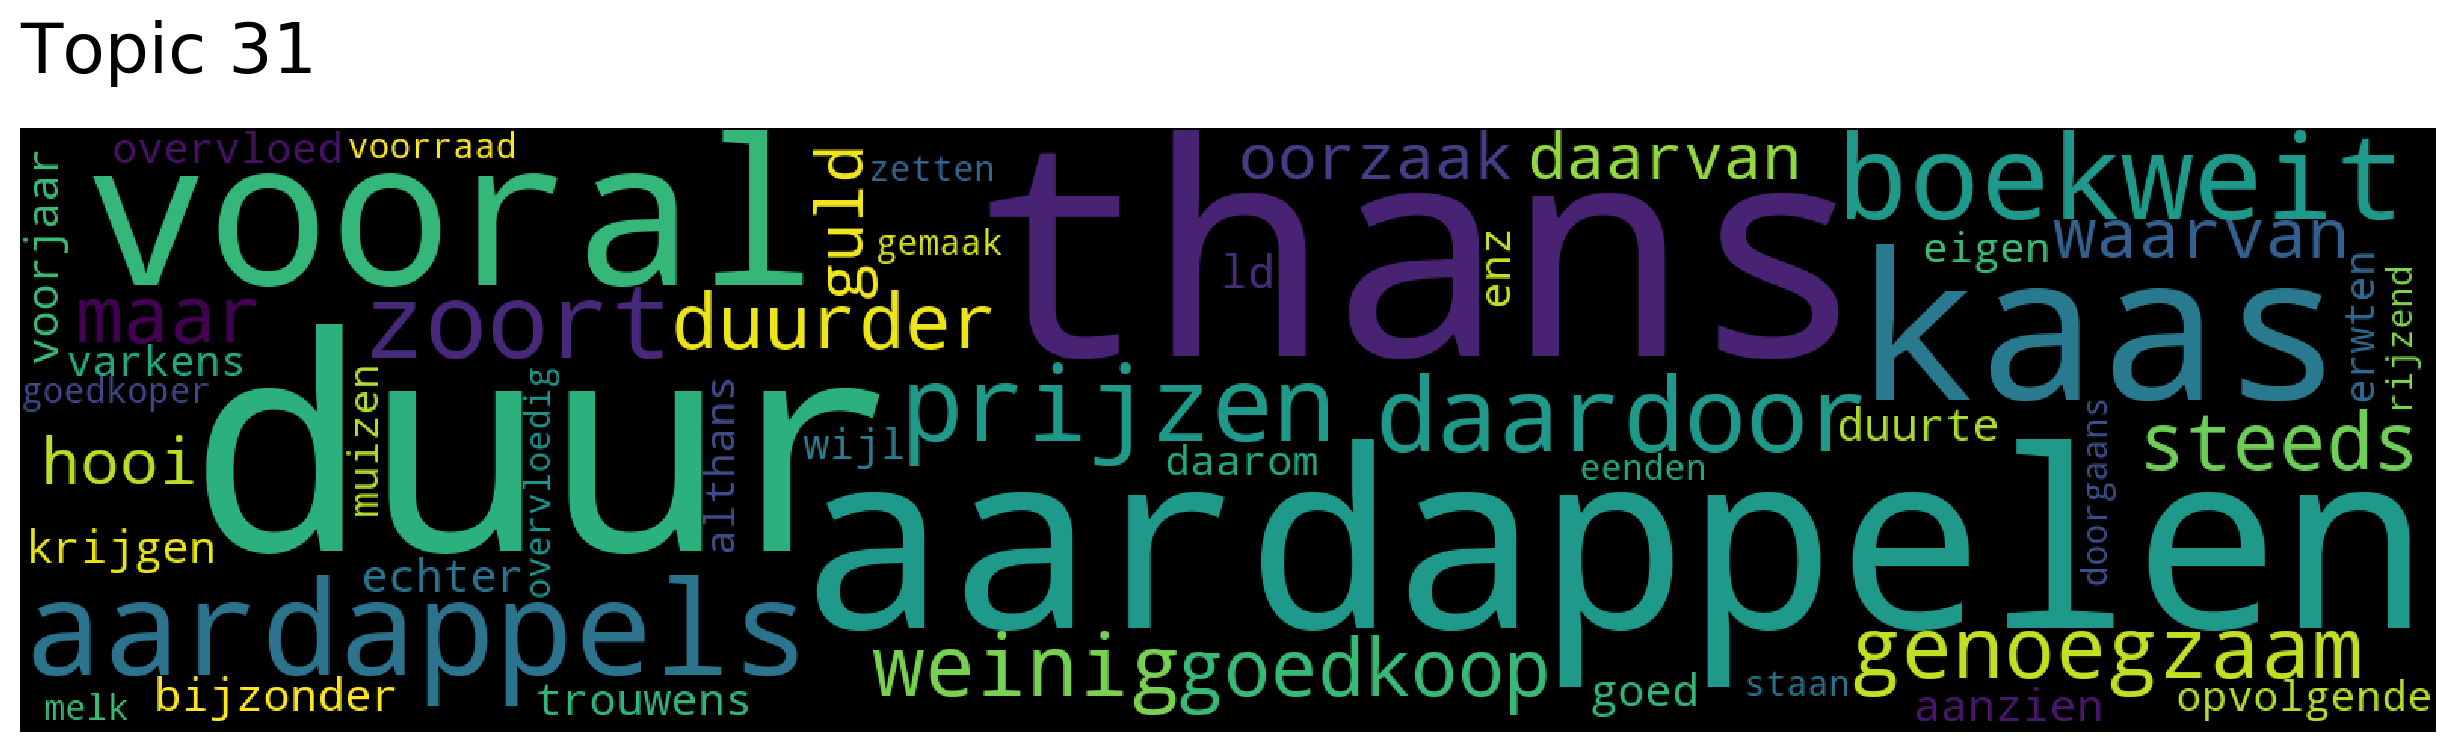

In [50]:
model.generate_topic_wordcloud(31)

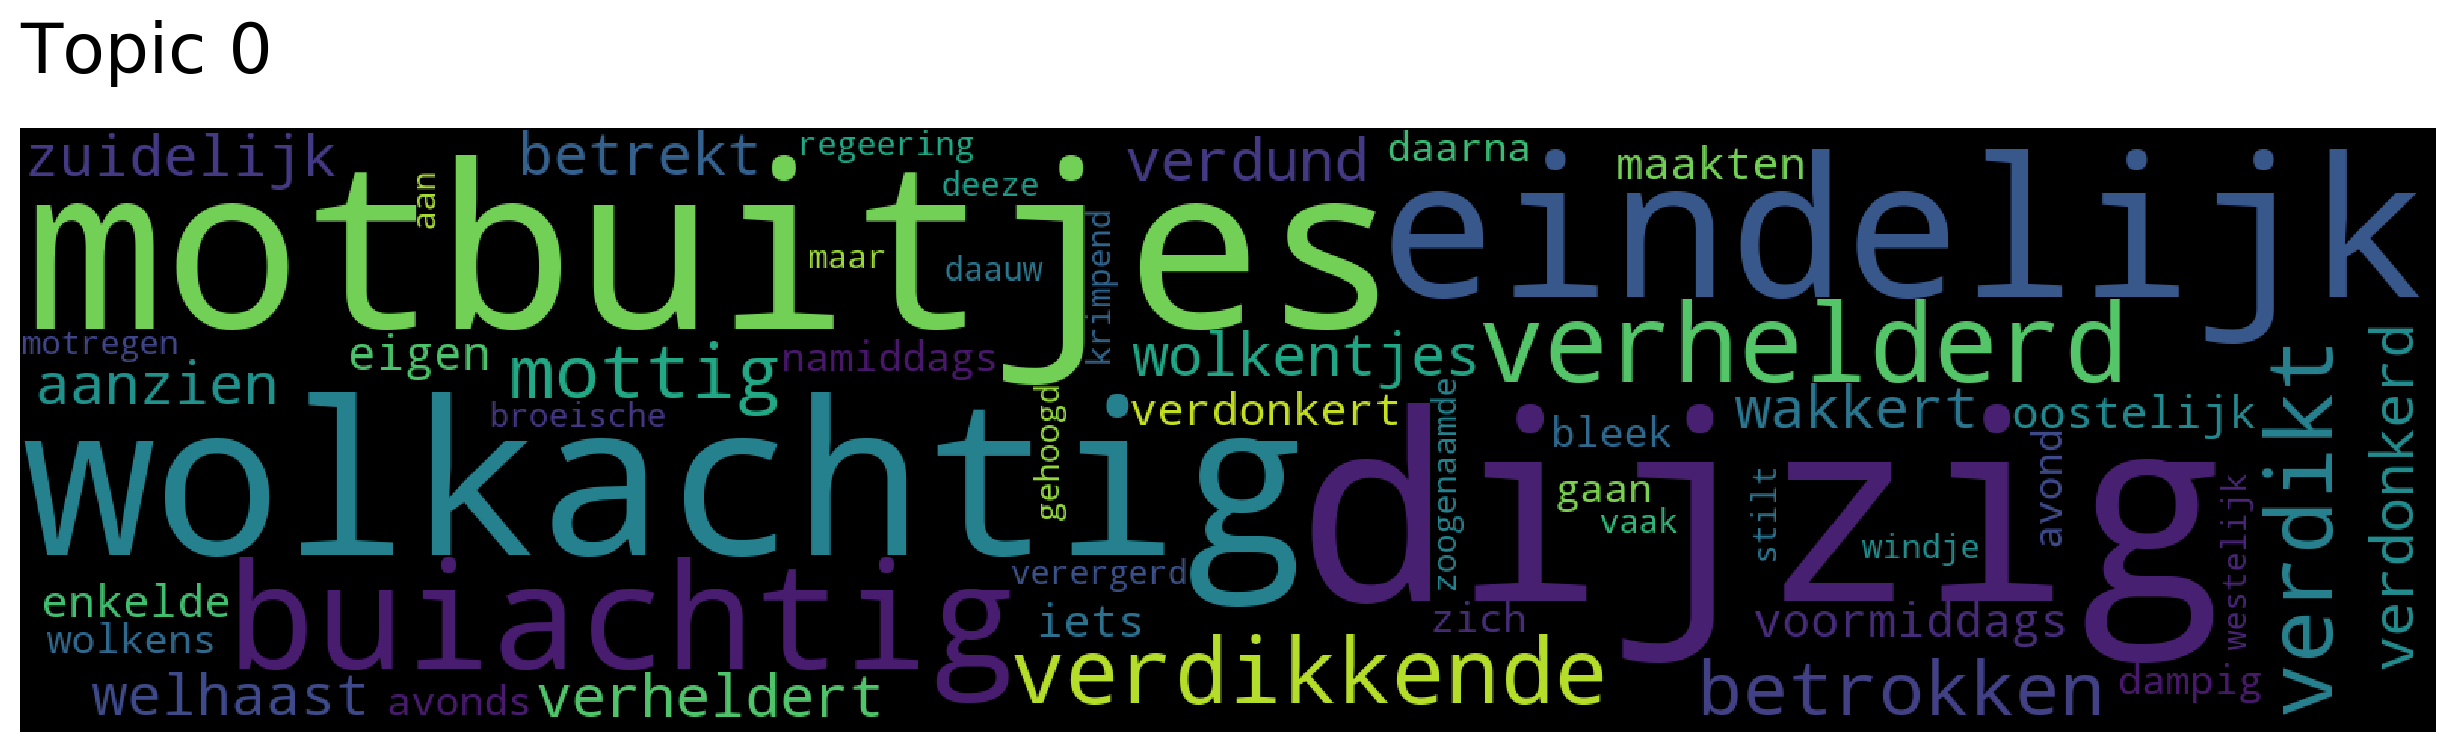

In [40]:
model.generate_topic_wordcloud(0)

In [60]:
model.get_topics(reduced=True)

(array([['motbuitjes', 'wolkachtig', 'dijzig', ..., 'vaak', 'avond',
         'gemaakt'],
        ['overleede', 'do', 'weeduwe', ..., 'kreeg', 'braave', 'geworde'],
        ['sur', 'un', 'pour', ..., 'fonctions', 'moyens', 'donne'],
        ...,
        ['pinck', 'koijen', 'begraaft', ..., 'swager', 'maanden', 'ja'],
        ['iseghem', 'hilonius', 'kortryk', ..., 'wereld', 'nauwelyks',
         'naderhand'],
        ['heeze', 'leende', 'tilburg', ..., 'dezelfde', 'bevestigd',
         'denzelfden']], dtype='<U15'),
 array([[0.5028843 , 0.49899572, 0.48206916, ..., 0.369322  , 0.36785483,
         0.36785358],
        [0.5346172 , 0.5256508 , 0.5042748 , ..., 0.37379274, 0.37302214,
         0.37121522],
        [0.6622853 , 0.6533228 , 0.65116787, ..., 0.60434836, 0.6040601 ,
         0.6036361 ],
        ...,
        [0.58000904, 0.5287279 , 0.51278454, ..., 0.30318877, 0.3025775 ,
         0.30000535],
        [0.6747709 , 0.59288144, 0.54518485, ..., 0.34774998, 0.34692225,
       

In [14]:
model.search_documents_by_topic(1, num_docs=10, reduced=True)

(array(['do is de Heer Jacob Bodisko, Bierbeschoijer overleeden 268',
        'do. Is de Heer Jacob Oortman, Geweermaaker, Overleeden,',
        '8 do is de Huijs vrou van de Heer Jan Terhorst, op de overtoomse weg woonende overleeden,',
        '15 do  is de Huijs vrou van de Heer Nicolaas Van Tame overleeden is de maakelaar Lemmers overleeden',
        '2 Maart   is de Huijs vrou van de Heer Jan Tiers overleeden,',
        '14 do Is de Heer Poulus Wenking de Jonge maakelaar overleeden,',
        '17 do . is de Huijs vrou van de Heer Wijnkoper Erik Tiers overleede',
        '16 do Is Mejuffrouw giesenbier overleeden in een hooge ouderdom, sij hat een seer Faaije plaats in de maarse laantje',
        '22 do  is de wel EdL Heer Scheepen Leonardt van Hoesen, overleede',
        '22 do  is de Huijs vrou van de Heer Been van Haamel overleede#'],
       dtype=object),
 array([0.85241294, 0.84860957, 0.84079134, 0.82981914, 0.82960826,
        0.82753557, 0.82710737, 0.82513577, 0.81678134, 

In [59]:
model.search_documents_by_keywords(['garnizoen', 'batterij'], num_docs=10)

(array(['Den twaelfsten  Kwam alhier van Doornyck aen zes stukken geschut en twee obitzen, met hunne buskruyd 306',
        "  Den  3 Februarij . Des nachts te 1 uur begon men wederom zwaar van de wallen te schieten, en wel langs den dijk benoorden Delfzijl op de batterij bij het huis van de Wedw. TRIJNTJE P. NAAT, bij Uitwierde, welke kanonnade bijna zonder ophouden dezen geheelen dag voortduurde. Dit schieten werd van genoemde batterij beantwoord, waardoor wederom eenige kogels in de forteresse gebragt werden, en eenige huizen werden beschadigd. Vervolgens reed de Kommandant met een beschonken hoofd, vergezeld van eenige Gensd'armes te paard, in vollen galop de vesting uit, ten einde, zoo het scheen, eene ontdekking   op voornoemde batterij te doen. Doch tot op de hoogte van de afgebrande boerderij van PIETER JAKOBS BOS gekomen, werden zij onverwacht van gemelde batterij zoodanig gesalueerd, dat weldra een' van de Gensd'armes het geheele hoofd werd weggeschoten, en de overigen het ha